This program displays a heat map of Expectation versus gamma and beta. 

In this representation, regions colored in red indicate higher Expectation values (positive), while blue areas indicate negative Expectation values.


このプログラムは、Heat map of Expectation VS gamma, beta を示しています。

赤色がExpectationの値が高い場所（プラス）で、青色がExpectation がマイナスとなる位置を示しています。

"Let's start by fixing \( P = 1 \) and observing the heatmaps for \( N=1,...,10 \)."

まずは、P=1に固定して、N＝1~10のときにどのようなヒートマップになるのか見てみよう。

When \( N => 4 \), the heatmap looks similar.

N=>4のときは、同じようなヒートマップになる。

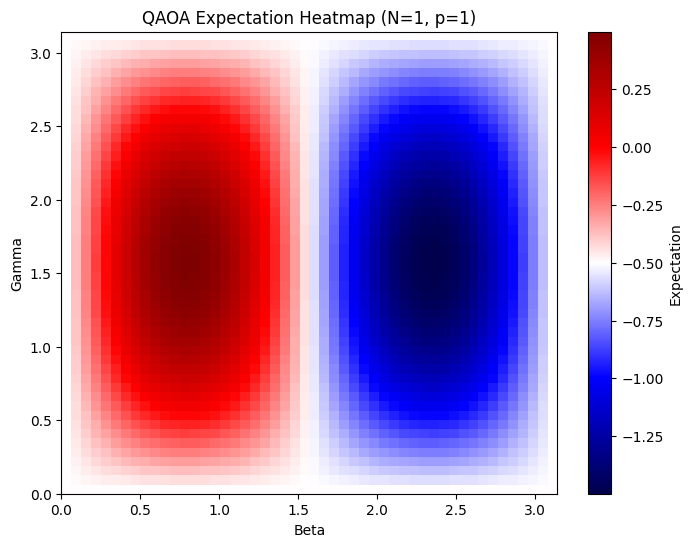

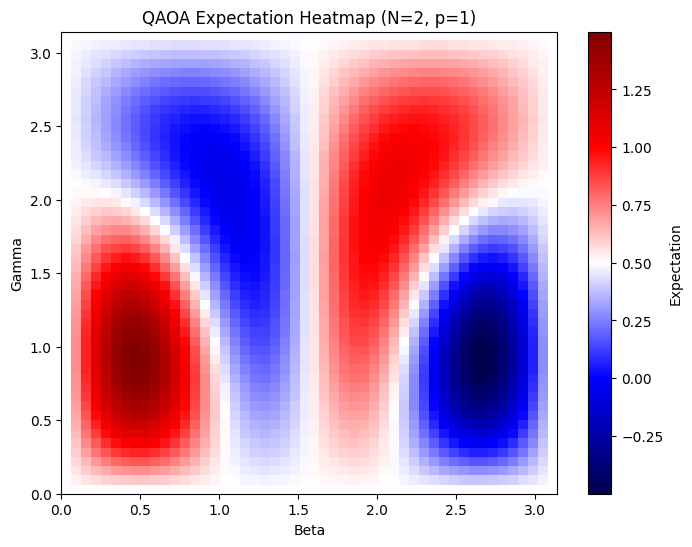

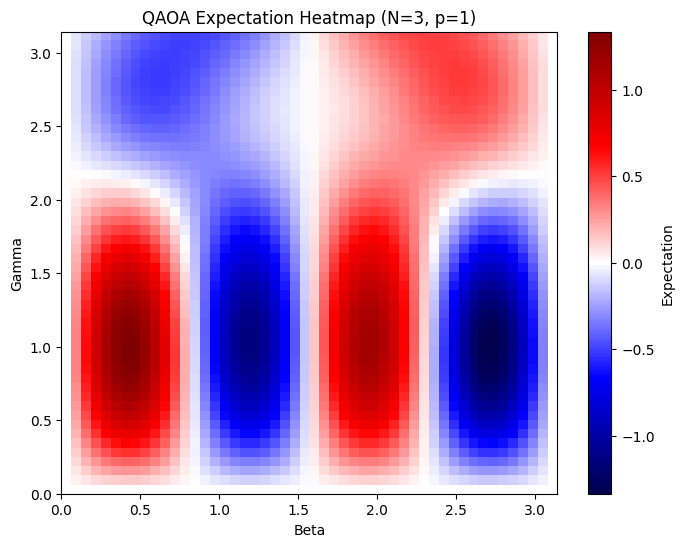

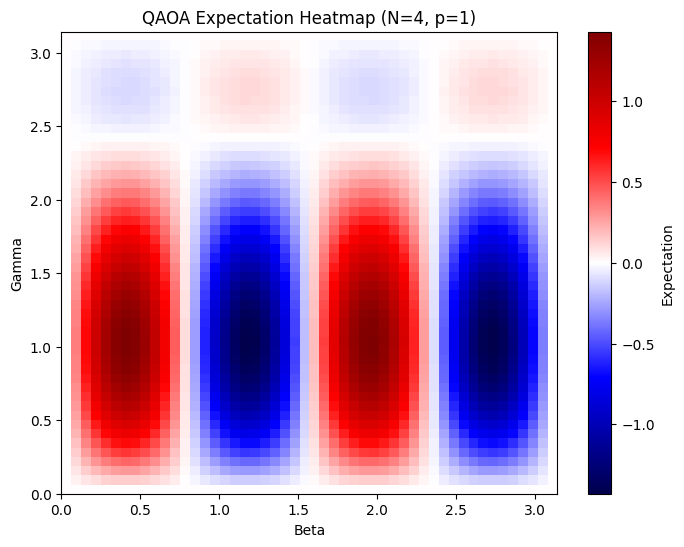

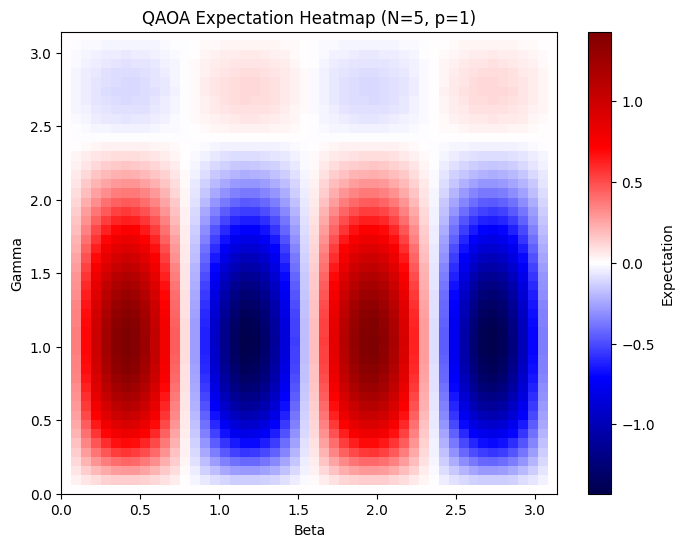

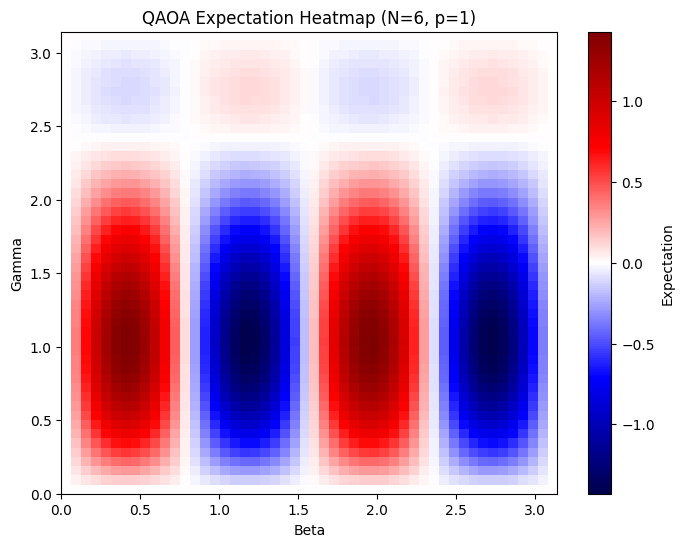

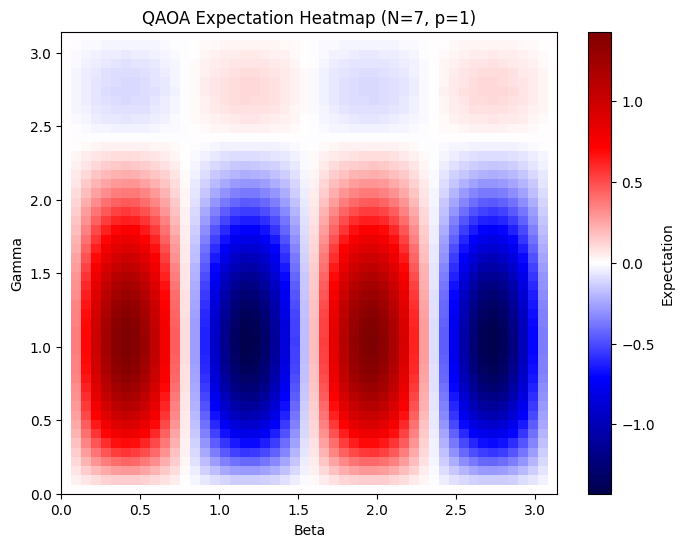

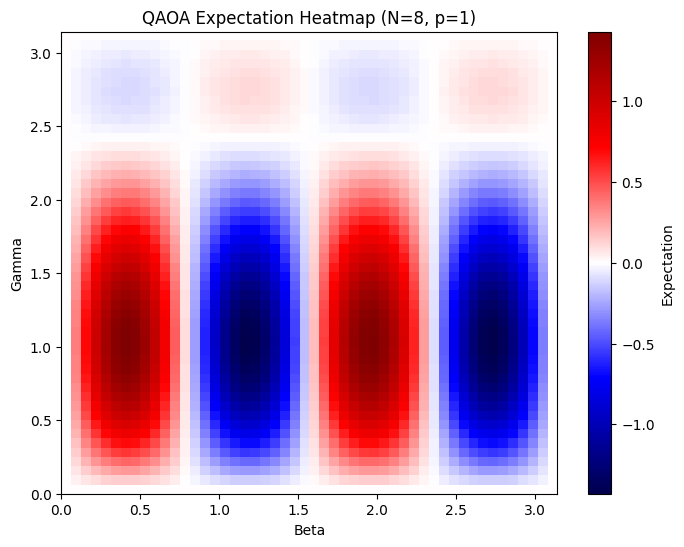

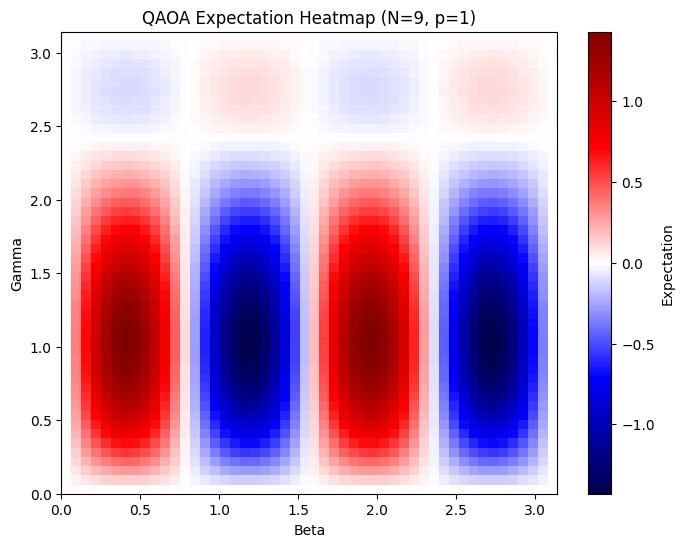

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import qokit
import scipy
import time
from qokit.fur.qaoa_simulator_base import QAOAFastSimulatorBase, TermsType
import os  # osモジュールのインポートを追加

# 乱数シードを設定
np.random.seed(0)

# 必要な関数の定義
def get_simulator(N: int, terms: TermsType, sim_or_none: QAOAFastSimulatorBase | None = None) -> QAOAFastSimulatorBase:
    if sim_or_none is None:
        simclass = qokit.fur.choose_simulator(name="auto")
        return simclass(N, terms=terms)
    else:
        return sim_or_none

def get_result(N: int, terms: TermsType, gamma: np.ndarray, beta: np.ndarray, sim: QAOAFastSimulatorBase | None = None, result: np.ndarray | None = None) -> np.ndarray:
    if result is None:
        simulator = get_simulator(N, terms, sim)
        return simulator.simulate_qaoa(gamma, beta)
    else:
        return result

def get_simulator_and_result(N: int, terms: TermsType, gamma: np.ndarray, beta: np.ndarray, sim: QAOAFastSimulatorBase | None = None, result: np.ndarray | None = None) -> tuple[QAOAFastSimulatorBase, np.ndarray]:
    simulator = get_simulator(N, terms, sim)
    if result is None:
        result = get_result(N, terms, gamma, beta, simulator)
    return (simulator, result)

def get_expectation(N: int, terms: TermsType, gamma: np.ndarray, beta: np.ndarray, sim: QAOAFastSimulatorBase | None = None, result: np.ndarray | None = None) -> float:
    simulator, result = get_simulator_and_result(N, terms, gamma, beta, sim, result)
    return simulator.get_expectation(result, preserve_state=True)


# QAOAの設定
terms = [
    (1.0, [0, 1]),  # 第0キュービットと第1キュービットの間の相互作用
    (-1.0, [1, 2]), # 第1キュービットと第2キュービットの間の相互作用
    (0.5, [2, 3]),  # 第2キュービットと第3キュービットの間の相互作用
]

# BetaとGammaの範囲を設定
beta_range = np.linspace(0, np.pi, 50)
gamma_range = np.linspace(0, np.pi, 50)

# 保存先ディレクトリを指定
save_dir = "data_for_graphs_Predict(4)"
os.makedirs(save_dir, exist_ok=True)  # ディレクトリが存在しない場合は作成する

# ヒートマップの作成
def create_heatmap(N: int, terms: list, p: int, beta_range: np.ndarray, gamma_range: np.ndarray):
    expectations = np.zeros((len(gamma_range), len(beta_range)))

    for i, gamma in enumerate(gamma_range):
        for j, beta in enumerate(beta_range):
            gamma_vec = np.full(p, gamma)
            beta_vec = np.full(p, beta)
            expectations[i, j] = get_expectation(N, terms, gamma_vec, beta_vec)

    plt.figure(figsize=(8, 6))
    plt.imshow(expectations, aspect='auto', cmap='seismic', origin='lower', extent=[beta_range[0], beta_range[-1], gamma_range[0], gamma_range[-1]])
    plt.colorbar(label='Expectation')
    plt.xlabel('Beta')
    plt.ylabel('Gamma')
    plt.title(f'QAOA Expectation Heatmap (N={N}, p={p})')
    plt.show()
    np.save(f"data_for_graphs_Predict(4)/data_for_QAOA_Expectation_Heatmap_N={N}_p={p}_kanon.npy", expectations)

# キュービット数の範囲を設定
N_values = range(1, 11)  # キュービット数を1から10まで繰り返す

# ループを使ってヒートマップを作成
for N in N_values:
    create_heatmap(N, terms, p=1, beta_range=beta_range, gamma_range=gamma_range)
